In [6]:
import os
import glob

from IPython.core.display import HTML

from indra_cogex.analysis.protein_analysis import explain_downstream

source_protein_name = 'CTNNB1'

target_protein_names = ['VWA2', 'LRP4', 'CTNNB1', 'GLCE', 'ACSL5', 'NOTUM', 'APCDD1',
                        'DKK4', 'EPHA7', 'CTNNA2', 'ADAMTSL2', 'CALML3', 'CEMIP2', 'AMOT',
                        'CXCL14', 'PLA2G4A', 'RCN2', 'TTC9', 'FABP4', 'GPCPD1', 'VSNL1',
                        'CRYBB1', 'LEF1', 'PDZD8', 'FNDC3A']

output_folder = 'analysis_test'

INFO: [2024-08-05 08:54:34] indra_cogex.analysis.protein_analysis - Dataframe of protiens that have INDRA relationships with source                    that have been filtered:
         name                                          stmt_json target_type  \
2490     LEF1  {"type": "Complex", "members": [{"name": "tcf7...        HGNC   
2491     LEF1  {"type": "Complex", "members": [{"name": "CTNN...        HGNC   
2492     LEF1  {"type": "IncreaseAmount", "subj": {"name": "C...        HGNC   
2493     LEF1  {"type": "Complex", "members": [{"name": "APC"...        HGNC   
2494     LEF1  {"type": "Complex", "members": [{"name": "LEF1...        HGNC   
...       ...                                                ...         ...   
10710  CTNNB1  {"type": "IncreaseAmount", "subj": {"name": "C...        HGNC   
10711  CTNNB1  {"type": "DecreaseAmount", "subj": {"name": "C...        HGNC   
10712  CTNNB1  {"type": "Inhibition", "subj": {"name": "CTNNB...        HGNC   
10713  CTNNB1  {"type": 

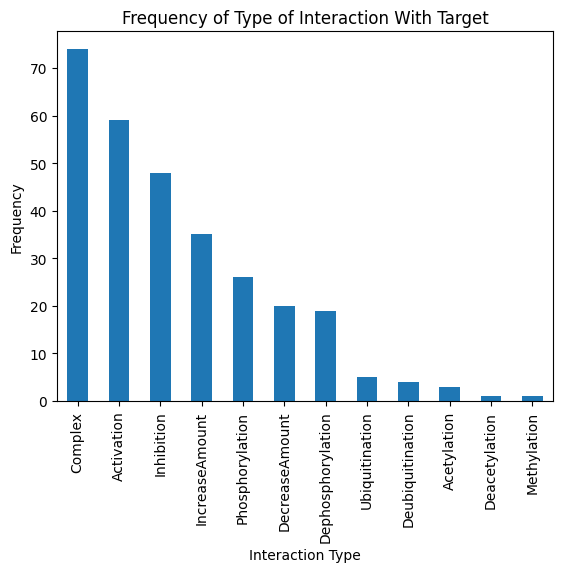

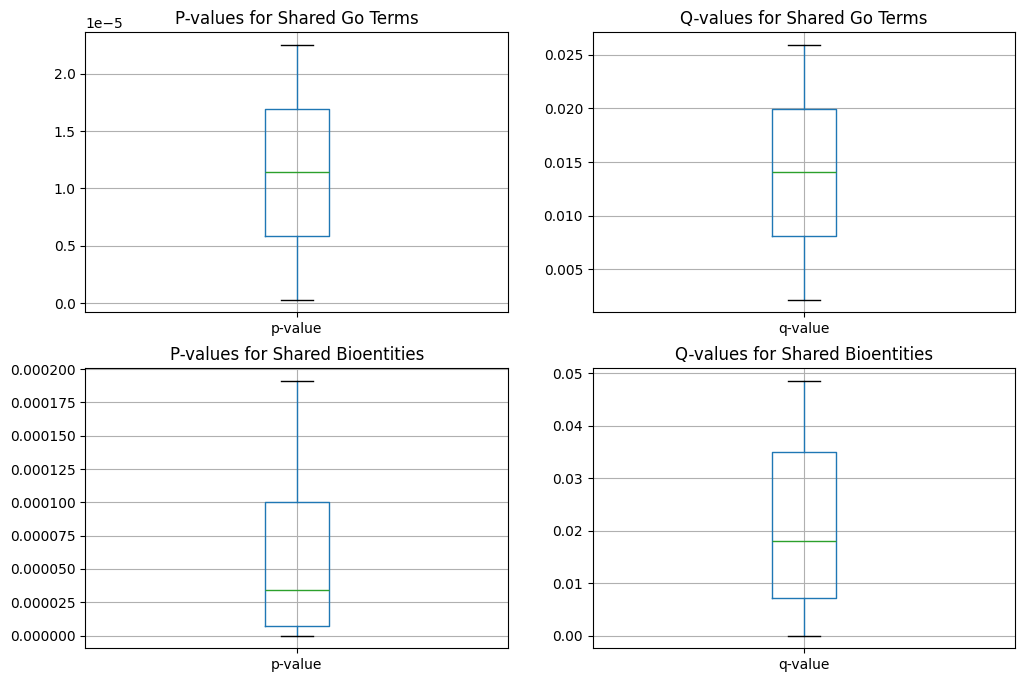

In [2]:
explain_downstream(source_protein_name, target_protein_names, 'analysis_test')

In [7]:
htmls = glob.glob(os.path.join(output_folder, '*.html'))
for html in htmls:
    HTML(html)

In [8]:
HTML(html)

In [9]:
from indra.sources import indra_db_rest

In [10]:
ip = indra_db_rest.get_statements(subject='LEF1')

INFO: [2024-08-05 12:00:27] indra_db_rest.query_processor - Retrieving statements that have an agent where NAME=LEF1 with role=SUBJECT.
INFO: [2024-08-05 12:00:27] indra_db_rest.request_logs - Running 0th request for statements
INFO: [2024-08-05 12:00:27] indra_db_rest.request_logs -   LIMIT: None
INFO: [2024-08-05 12:00:27] indra_db_rest.request_logs -   OFFSET: 0
INFO: [2024-08-05 12:00:34] indra_db_rest.request_logs - Running 1st request for statements
INFO: [2024-08-05 12:00:34] indra_db_rest.request_logs -   LIMIT: None
INFO: [2024-08-05 12:00:34] indra_db_rest.request_logs -   OFFSET: 500
INFO: [2024-08-05 12:00:37] indra_db_rest.request_logs - Running 2nd request for statements
INFO: [2024-08-05 12:00:37] indra_db_rest.request_logs -   LIMIT: None
INFO: [2024-08-05 12:00:37] indra_db_rest.request_logs -   OFFSET: 1000
INFO: [2024-08-05 12:00:40] indra_db_rest.request_logs - Running 3rd request for statements
INFO: [2024-08-05 12:00:40] indra_db_rest.request_logs -   LIMIT: None


In [27]:
from indra.tools import assemble_corpus as ac
stmts = ac.filter_gene_list(ip.statements, set(target_protein_names) - {'CTNNB1'} | {'LEF1'}, policy='all')

INFO: [2024-08-05 12:08:31] indra.tools.assemble_corpus - Filtering 5026 statements for ones containing "all" of: CRYBB1, FNDC3A, CXCL14, APCDD1, PDZD8, VSNL1, AMOT, FABP4, LRP4, EPHA7, CALML3, NOTUM, LEF1, VWA2, DKK4, CEMIP2, TTC9, GPCPD1, ACSL5, RCN2, ADAMTSL2, CTNNA2, PLA2G4A, GLCE...
INFO: [2024-08-05 12:08:31] indra.tools.assemble_corpus - 25 statements after filter...


In [28]:
stmts

[Activation(LEF1(), LEF1()),
 DecreaseAmount(LEF1(), LEF1()),
 Inhibition(LEF1(), LEF1()),
 IncreaseAmount(LEF1(), LEF1()),
 IncreaseAmount(LEF1(), LEF1()),
 IncreaseAmount(LEF1(mods: (modification)), LEF1()),
 DecreaseAmount(LEF1(), ACSL5()),
 DecreaseAmount(LEF1(), VWA2()),
 Complex(LEF1(), LEF1()),
 Inhibition(LEF1(), LEF1()),
 DecreaseAmount(LEF1(), PLA2G4A()),
 DecreaseAmount(LEF1(), CTNNA2()),
 DecreaseAmount(LEF1(), LEF1()),
 DecreaseAmount(LEF1(), VSNL1()),
 DecreaseAmount(LEF1(), FABP4()),
 DecreaseAmount(LEF1(), LEF1(muts: (K, 86, E))),
 DecreaseAmount(LEF1(mods: (modification)), LEF1()),
 Phosphorylation(LEF1(), LEF1(mods: (phosphorylation))),
 Activation(LEF1(), LEF1(muts: (None, None, None))),
 DecreaseAmount(LEF1(), RCN2()),
 DecreaseAmount(LEF1(), CEMIP2()),
 Activation(LEF1(), LEF1()),
 IncreaseAmount(LEF1(), LEF1(muts: (K, 86, E))),
 DecreaseAmount(LEF1(), EPHA7()),
 IncreaseAmount(LEF1(), DKK4())]

In [29]:
stmts = [s for s in stmts if len({x.name for x in s.real_agent_list()}) > 1]

In [30]:
stmts

[DecreaseAmount(LEF1(), ACSL5()),
 DecreaseAmount(LEF1(), VWA2()),
 DecreaseAmount(LEF1(), PLA2G4A()),
 DecreaseAmount(LEF1(), CTNNA2()),
 DecreaseAmount(LEF1(), VSNL1()),
 DecreaseAmount(LEF1(), FABP4()),
 DecreaseAmount(LEF1(), RCN2()),
 DecreaseAmount(LEF1(), CEMIP2()),
 DecreaseAmount(LEF1(), EPHA7()),
 IncreaseAmount(LEF1(), DKK4())]

In [31]:
from indra.assemblers.html import HtmlAssembler

In [32]:
ha = HtmlAssembler(stmts)

In [33]:
_ = ha.make_model(grouping_level='statement')
ha.save_model('LEF1_explanations.html')

In [34]:
ip = indra_db_rest.get_statements(subject='TCF7L2')

INFO: [2024-08-05 12:10:50] indra_db_rest.query_processor - Retrieving statements that have an agent where NAME=TCF7L2 with role=SUBJECT.
INFO: [2024-08-05 12:10:50] indra_db_rest.request_logs - Running 0th request for statements
INFO: [2024-08-05 12:10:50] indra_db_rest.request_logs -   LIMIT: None
INFO: [2024-08-05 12:10:50] indra_db_rest.request_logs -   OFFSET: 0
INFO: [2024-08-05 12:10:54] indra_db_rest.request_logs - Running 1st request for statements
INFO: [2024-08-05 12:10:54] indra_db_rest.request_logs -   LIMIT: None
INFO: [2024-08-05 12:10:54] indra_db_rest.request_logs -   OFFSET: 500
INFO: [2024-08-05 12:10:56] indra_db_rest.request_logs - Running 2nd request for statements
INFO: [2024-08-05 12:10:56] indra_db_rest.request_logs -   LIMIT: None
INFO: [2024-08-05 12:10:56] indra_db_rest.request_logs -   OFFSET: 1000


In [38]:
stmts = ac.filter_gene_list(ip.statements, set(target_protein_names) - {'CTNNB1'} | {'TCF7L2'}, policy='all')
stmts = [s for s in stmts if len({x.name for x in s.real_agent_list()}) > 1]

INFO: [2024-08-05 12:12:46] indra.tools.assemble_corpus - Filtering 1170 statements for ones containing "all" of: CRYBB1, FNDC3A, CXCL14, APCDD1, PDZD8, VSNL1, AMOT, FABP4, LRP4, EPHA7, CALML3, NOTUM, LEF1, VWA2, TCF7L2, DKK4, CEMIP2, TTC9, GPCPD1, ACSL5, RCN2, ADAMTSL2, CTNNA2, PLA2G4A, GLCE...
INFO: [2024-08-05 12:12:46] indra.tools.assemble_corpus - 11 statements after filter...


In [39]:
ha = HtmlAssembler(stmts)
_ = ha.make_model(grouping_level='statement')
ha.save_model('TCF7L2_explanations.html')